<a href="https://colab.research.google.com/github/aryannuka/data-science/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials are most effective when the data exhibits a highly complex relationship. However, it's important to note that increasing the degree of the polynomial arbitrarily can lead to overfitting and reduce predictive accuracy. One advantage of using polynomials is that they can improve the model’s fit to the data.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Simpler models are generally preferred because they run faster on computers, help prevent overfitting and overconfidence in prior assumptions, and are easier to interpret. Polynomial terms should typically only be used when the data is highly complex, and you are prepared to manage the risk of overfitting.

**Task3**:

What's the point of using b splines?

B-splines can be thought of as a more practical and flexible alternative to polynomials. They divide the graph into segments and assign weights to each piece, allowing the model to capture complex patterns with greater flexibility while reducing the risk of overfitting.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

Gaussian Processes (GPs) can be thought of as a more flexible version of B-splines, where there is effectively a knot at every possible value of X. This is based on the assumption that every point in the data influences every other point, allowing for a smooth and continuous estimation of the underlying pattern.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-uu7lc38s
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-uu7lc38s
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=5169426be6025bb61c0fd824c1f44e1eac575359c3fde74c93a3f1518005d70e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7n0obe3l/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.3 MB/s eta 0:00:00
   ━

In [ ]:
num_knots = 6
knots = np.linspace(53.975,100, num_knots+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


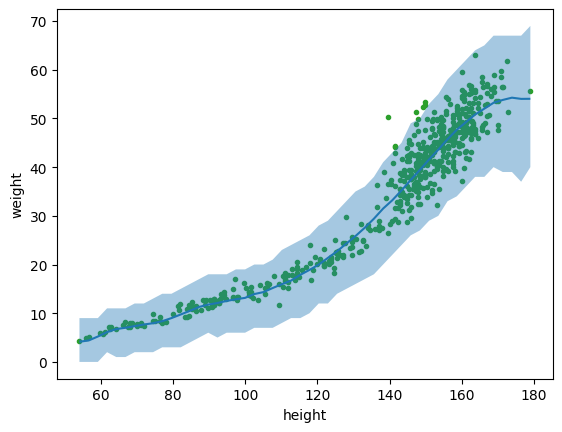

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

Gaussian Processes (GPs) need an appropriate covariance function (kernel) selection to properly model data according to the article. The covariance function defines relationships between data points in addition to allowing different kernels to model various smoothness levels as well as periodicity and change points in the data. Using multiple kernels for analysis in the Mauna Loa example gives researchers access to detect long-term patterns and short-term changes yet requires advanced knowledge of GP mathematical principles to achieve effective results. I got a better understanding of how tough it is to properly implement GPs because they require advanced technical execution.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

The plot that visualizes the CO₂ data with the modeled changepoint behavior stands out to me as one of the best graphs in the "Changepoints" section. A smooth curve in the graph depicts the main pattern together with distinct shifts which represent the detected changepoints. A covariance structure enables the function to make smooth transitions among different regimes during modeling.

The combination of Gaussian Processes with changepoints demonstrates excellent flexibility according to me. The model shows its ability to tackle rapid data modifications by keeping an overall smooth fitting process. The data pattern reflects real-life trends which display unexpected paths without single-smooth trajectories so I find this observation particularly interesting. The graphical representation presents a concise design which allows users to view clear details about change points and model adaptions.